<a href="https://colab.research.google.com/github/baker371/SITE/blob/master/Business_Data_Analyst_Interview_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imprting Libraries

In [ ]:
import pandas as pd 
import pandas.io.sql as sqlio
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

%reload_ext google.colab.data_table

#remove warnings
import warnings
warnings.filterwarnings("ignore")

### Connecting to the database

In [ ]:
con = psycopg2.connect("host=54.175.254.25 dbname=rocket_spark user=data_analyst password=secret")

### Users table

In [ ]:
users = sqlio.read_sql_query("select * FROM users;", con)
users

,user_id,first_name,last_name,gender,level
0,8,Kaylee,Summers,F,free
1,10,Sylvie,Cruz,F,free
2,26,Ryan,Smith,M,free
3,101,Jayden,Fox,M,free
4,83,Stefany,White,F,free
...,...,...,...,...,...
85,45,Dominick,Norris,M,free
86,65,Amiya,Davidson,F,paid
87,19,Zachary,Thomas,M,free
88,56,Cienna,Freeman,F,free


### Artists table

In [ ]:
artists = sqlio.read_sql_query("select * FROM artists;", con)
artists

,artist_id,name,location,latitude,longitude
0,ARD7TVE1187B99BFB1,Casual,California - LA,NaN,NaN
1,ARMJAGH1187FB546F3,The Box Tops,"Memphis, TN",35.14968,-90.04892
2,ARKRRTF1187B9984DA,Sonora Santanera,,NaN,NaN
3,AR7G5I41187FB4CE6C,Adam Ant,"London, England",NaN,NaN
4,ARXR32B1187FB57099,Gob,,NaN,NaN
...,...,...,...,...,...
64,AR8IEZO1187B99055E,Marc Shaiman,,NaN,NaN
65,AR558FS1187FB45658,40 Grit,,NaN,NaN
66,ARVBRGZ1187FB4675A,Gwen Stefani,,NaN,NaN
67,ARWB3G61187FB49404,Steve Morse,"Hamilton, Ohio",NaN,NaN


### Time table

In [ ]:
time = sqlio.read_sql_query("select * FROM time;", con)

time

,start_time,hour,day,week,month,year,weekday
0,2018-11-01 21:01:46.796,21,1,44,11,2018,3
1,2018-11-01 21:05:52.796,21,1,44,11,2018,3
2,2018-11-01 21:08:16.796,21,1,44,11,2018,3
3,2018-11-01 21:11:13.796,21,1,44,11,2018,3
4,2018-11-01 21:17:33.796,21,1,44,11,2018,3
...,...,...,...,...,...,...,...
4973,2018-11-23 21:28:21.796,21,23,47,11,2018,4
4974,2018-11-23 21:37:30.796,21,23,47,11,2018,4
4975,2018-11-23 21:39:49.796,21,23,47,11,2018,4
4976,2018-11-23 21:42:09.796,21,23,47,11,2018,4


### Songs table

In [ ]:
songs = sqlio.read_sql_query("select * FROM songs;", con)
songs

,song_id,title,artist_id,year,duration
0,SOMZWCG12A8C13C480,I Didn't Mean To,ARD7TVE1187B99BFB1,0,218.93179
1,SOCIWDW12A8C13D406,Soul Deep,ARMJAGH1187FB546F3,1969,148.03546
2,SOXVLOJ12AB0189215,Amor De Cabaret,ARKRRTF1187B9984DA,0,177.47546
3,SONHOTT12A8C13493C,Something Girls,AR7G5I41187FB4CE6C,1982,233.40363
4,SOFSOCN12A8C143F5D,Face the Ashes,ARXR32B1187FB57099,2007,209.60608
...,...,...,...,...,...
66,SOINLJW12A8C13314C,City Slickers,AR8IEZO1187B99055E,2008,149.86404
67,SOGDBUF12A8C140FAA,Intro,AR558FS1187FB45658,2003,75.67628
68,SORRZGD12A6310DBC3,Harajuku Girls,ARVBRGZ1187FB4675A,2004,290.55955
69,SODAUVL12A8C13D184,Prognosis,ARWB3G61187FB49404,2000,363.85914


### Songplays table

In [ ]:
songplays = sqlio.read_sql_query("select * FROM songplays;", con)
songplays

,song_play_id,start_time,user_id,level,song_id,artist_id,session_id,location,user_agent
0,32,1541109125796,26,free,None,None,169,"San Jose-Sunnyvale-Santa Clara, CA",26
1,61,1541152499796,15,paid,None,None,172,"Chicago-Naperville-Elgin, IL-IN-WI",15
2,67,1541153639796,15,paid,None,None,172,"Chicago-Naperville-Elgin, IL-IN-WI",15
3,11,1541108520796,10,free,SOCIWDW12A8C13D406,ARMJAGH1187FB546F3,9,"Washington-Arlington-Alexandria, DC-VA-MD-WV",10
4,16,1541121934796,101,free,SOZQDIU12A58A7BCF6,ARNTLGG11E2835DDB9,184,"New Orleans-Metairie, LA",101
...,...,...,...,...,...,...,...,...,...
1363,1056,1541541893796,97,paid,SOXILUQ12A58A7C72A,ARP6N5A1187B99D1A3,293,"Lansing-East Lansing, MI","""Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5..."
1364,1323,1541673845796,72,paid,SOPEGZN12AB0181B3D,AREDL271187FB40F44,117,"Detroit-Warren-Dearborn, MI",Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; r...
1365,1348,1541678854796,83,free,SOSWKAV12AB018FC91,ARULZCI1241B9C8611,375,"Lubbock, TX","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4..."
1366,1133,1541589678796,86,free,SOQVMXR12A81C21483,ARKULSX1187FB45F84,204,"La Crosse-Onalaska, WI-MN","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4..."


### **Question 1: Find all users (first_name, last_name, gender and level) (song title) who have listened to the song Face the Ashes in year 2018**

In [73]:
qn1 = sqlio.read_sql_query("SELECT u.first_name,u.last_name,u.gender,u.level,t.title FROM songplays s INNER JOIN users u ON CAST(u.user_id AS CHAR(5)) = s.user_id INNER JOIN songs as t ON t.song_id = s.song_id WHERE title = 'Face the Ashes';", con)
qn1

,first_name,last_name,gender,level,title
0,Aleena,Kirby,F,paid,Face the Ashes
1,Jacob,Klein,M,paid,Face the Ashes
2,Katherine,Gay,F,free,Face the Ashes


### **Question 2: Provide top 100 most played songs songplays (song title , location, artist name, duration, (column count for how many times it was played )**

In [74]:
qn2 = sqlio.read_sql_query("SELECT t.title,s.location,a.name AS artist_name,t.duration, COUNT(title) FROM songplays s INNER JOIN songs AS t  ON t.song_id = s.song_id INNER JOIN artists AS a ON a.artist_id = s.artist_id GROUP BY t.title,s.location,a.name,t.duration ORDER BY count DESC LIMIT 100 ;", con)
qn2

,title,location,artist_name,duration,count
0,The Ballad Of Sleeping Beauty,"Chicago-Naperville-Elgin, IL-IN-WI",Sophie B. Hawkins,305.16200,14
1,Streets On Fire (Explicit Album Version),"Chicago-Naperville-Elgin, IL-IN-WI",Lupe Fiasco,279.97995,12
2,Sonnerie lalaleulé hi houuu,"Chicago-Naperville-Elgin, IL-IN-WI",Blingtones,29.54404,10
3,Sono andati? Fingevo di dormire,"Chicago-Naperville-Elgin, IL-IN-WI",Montserrat Caballé;Placido Domingo;Vicente Sar...,511.16363,10
4,Der Kleine Dompfaff,"Chicago-Naperville-Elgin, IL-IN-WI",Line Renaud,152.92036,9
...,...,...,...,...,...
95,Soul Deep,"Waterloo-Cedar Falls, IA",The Box Tops,148.03546,3
96,Music is what we love,"Tampa-St. Petersburg-Clearwater, FL",Wilks,261.51138,3
97,Wild Rose (Back 2 Basics Mix),"Portland-South Portland, ME",Bombay Rockers,230.71302,3
98,Native Soul,"Waterloo-Cedar Falls, IA",Danilo Perez,197.19791,3


### **Question 3: By explorative data analysis find if there are gainful insights between location and artists and song played**

In [78]:
qn3 = sqlio.read_sql_query("SELECT t.title,s.location,a.name AS artist_name,t.duration,t.year,s.level FROM songplays s INNER JOIN songs AS t  ON t.song_id = s.song_id INNER JOIN artists AS a ON a.artist_id = s.artist_id;", con)
qn3.head(10)

,title,location,artist_name,duration,year,level
0,Soul Deep,"Washington-Arlington-Alexandria, DC-VA-MD-WV",The Box Tops,148.03546,1969,free
1,Superconfidential,"New Orleans-Metairie, LA",Clp,338.31138,0,free
2,Midnight Star,"Phoenix-Mesa-Scottsdale, AZ",Luna Orbit Project,335.51628,0,free
3,Kutt Free (DJ Volume Remix),"Phoenix-Mesa-Scottsdale, AZ",Jinx,407.37914,0,free
4,Der Kleine Dompfaff,"New Orleans-Metairie, LA",Line Renaud,152.92036,0,free
5,City Slickers,"Phoenix-Mesa-Scottsdale, AZ",Marc Shaiman,149.86404,2008,free
6,Midnight Star,"Phoenix-Mesa-Scottsdale, AZ",Luna Orbit Project,335.51628,0,free
7,Kutt Free (DJ Volume Remix),"Lubbock, TX",Jinx,407.37914,0,free
8,Music is what we love,"Phoenix-Mesa-Scottsdale, AZ",Wilks,261.51138,0,free
9,Sono andati? Fingevo di dormire,"Chicago-Naperville-Elgin, IL-IN-WI",Montserrat Caballé;Placido Domingo;Vicente Sar...,511.16363,0,paid


In [79]:
qn3.tail(10) 

,title,location,artist_name,duration,year,level
1218,Erica (2005 Digital Remaster),"Chicago-Naperville-Elgin, IL-IN-WI",Eddie Calvert,138.63138,0,paid
1219,Loaded Like A Gun,"New York-Newark-Jersey City, NY-NJ-PA",Steel Rain,173.19138,0,paid
1220,Larger Than Life,"Portland-South Portland, ME",Backstreet Boys,236.25098,1999,paid
1221,Jenny Take a Ride,"Chicago-Naperville-Elgin, IL-IN-WI",Mitch Ryder,207.43791,2004,paid
1222,Kutt Free (DJ Volume Remix),"Lansing-East Lansing, MI",Jinx,407.37914,0,paid
1223,Jenny Take a Ride,"Lansing-East Lansing, MI",Mitch Ryder,207.43791,2004,paid
1224,Get Your Head Stuck On Your Neck,"Detroit-Warren-Dearborn, MI",Soul Mekanik,45.66159,0,paid
1225,Midnight Star,"Lubbock, TX",Luna Orbit Project,335.51628,0,free
1226,Salt In NYC,"La Crosse-Onalaska, WI-MN",Trafik,424.12363,0,free
1227,Ten Tonne,"New Haven-Milford, CT",Chase & Status,337.68444,2005,free


In [81]:
qn3.shape

(1228, 6)

In [80]:
# Checking the data types
qn3.dtypes

title           object
location        object
artist_name     object
duration       float64
year             int64
level           object
dtype: object

In [82]:
# Counting number of records in rows
qn3.count()   

title          1228
location       1228
artist_name    1228
duration       1228
year           1228
level          1228
dtype: int64

In [84]:
# Checking for empty columns
print(qn3.isnull().sum())

title          0
location       0
artist_name    0
duration       0
year           0
level          0
dtype: int64


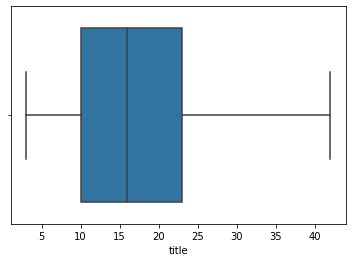

In [86]:
# Detecting outliers in the count of songs played
sns.boxplot(x=qn3['title'].value_counts())

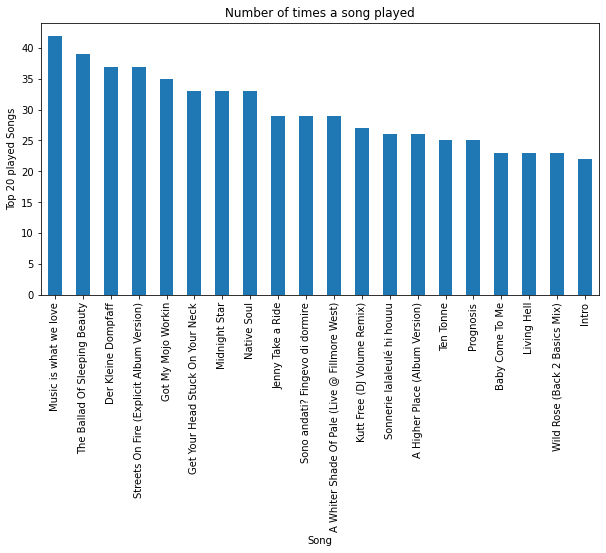

In [111]:
# Plotting the number of times a song played
qn3.title.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Number of times a song played")
plt.ylabel('Top 20 played Songs')
plt.xlabel('Song');

In [90]:
# Statistics on Song Duration and year
qn3.describe()

,duration,year
count,1228.000000,1228.000000
mean,244.037954,750.650651
std,110.419353,966.985303
min,29.544040,0.000000
25%,167.614240,0.000000
50%,236.250980,0.000000
75%,307.382400,1994.000000
max,599.248530,2008.000000


### **Question 4: Using the song_plays table, write an SQL query to find the record which is the fourth most listened song.**

In [104]:
qn4 = sqlio.read_sql_query("SELECT t.title,COUNT(title) AS times_played FROM songplays s INNER JOIN songs AS t  ON t.song_id = s.song_id GROUP BY title ORDER BY times_played DESC LIMIT 4;", con)
qn4

,title,times_played
0,Music is what we love,42
1,The Ballad Of Sleeping Beauty,39
2,Streets On Fire (Explicit Album Version),37
3,Der Kleine Dompfaff,37


Der Kleine Dompfaff is the fourth most played song

### **Question 5: Based on your analysis derive to what extent is there correlation between songplays and userslevel(free , paid )**

In [105]:
qn5 = qn3.groupby('title')['level'].value_counts().unstack().fillna(0)
qn5

level,free,paid
title,,
A Higher Place (Album Version),8.0,18.0
A Whiter Shade Of Pale (Live @ Fillmore West),9.0,20.0
Amor De Cabaret,1.0,5.0
Auguri Cha Cha,2.0,3.0
Baby Come To Me,8.0,15.0
...,...,...
Twist and Shout,5.0,11.0
Wessex Loses a Bride,6.0,10.0
Wild Rose (Back 2 Basics Mix),7.0,16.0


Text(0.5, 1.0, 'Bar graph showing FREE VS PAID Songs')

<Figure size 1080x720 with 0 Axes>

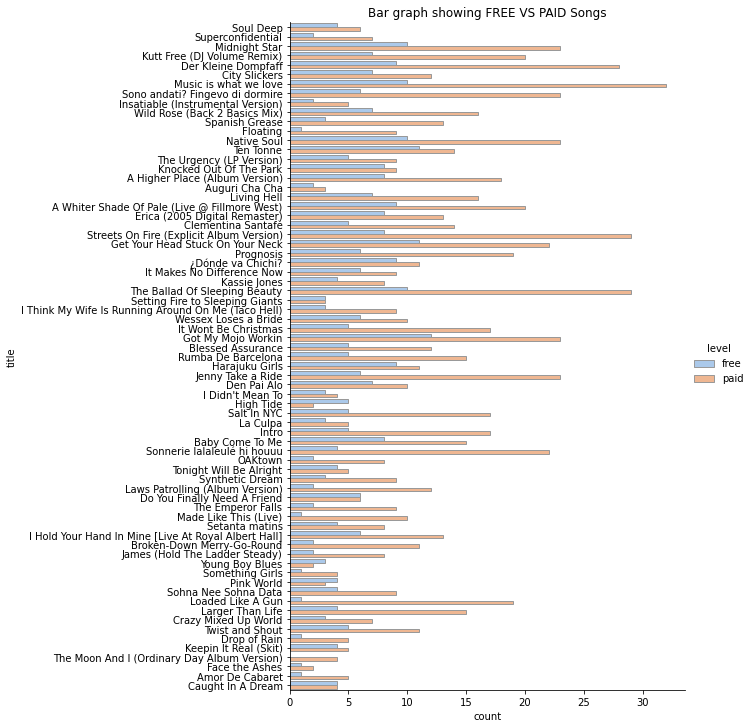

In [109]:
plt.figure(figsize=(15,10))
sns.catplot(y="title", hue="level", kind="count",palette="pastel", edgecolor=".6", data=qn3, height=10);
plt.title("Bar graph showing FREE VS PAID Songs")

In [ ]:
con = None